In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('shopping_behavior_updated.csv')

In [3]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
complete_descriptive_statistics = data.describe(include='all')

print(complete_descriptive_statistics)

        Customer ID          Age Gender Item Purchased  Category  \
count   3900.000000  3900.000000   3900           3900      3900   
unique          NaN          NaN      2             25         4   
top             NaN          NaN   Male         Blouse  Clothing   
freq            NaN          NaN   2652            171      1737   
mean    1950.500000    44.068462    NaN            NaN       NaN   
std     1125.977353    15.207589    NaN            NaN       NaN   
min        1.000000    18.000000    NaN            NaN       NaN   
25%      975.750000    31.000000    NaN            NaN       NaN   
50%     1950.500000    44.000000    NaN            NaN       NaN   
75%     2925.250000    57.000000    NaN            NaN       NaN   
max     3900.000000    70.000000    NaN            NaN       NaN   

        Purchase Amount (USD) Location  Size  Color  Season  Review Rating  \
count             3900.000000     3900  3900   3900    3900    3900.000000   
unique                    N

## Variables Numéricas
* Customer ID: Varía de 1 a 3900, lo que indica que hay 3900 entradas únicas.
* Age: Las edades van de 18 a 70 años, con una media de 44.07 años.
* Purchase Amount (USD): El monto de la compra varía entre 20 y 100 USD, con un promedio de 59.76 USD.
* Review Rating: Las calificaciones de revisión varían de 2.5 a 5, con un promedio de 3.75.
* Previous Purchases: El número de compras previas varía de 1 a 50, con una media de 25.35.
## Variables Categóricas
* Gender: Dos categorías únicas ('Male' y 'Female'), siendo 'Male' la más frecuente con 2652 ocurrencias.
* Item Purchased: 25 artículos únicos comprados, con 'Blouse' siendo el más común (171 veces).
* Category: Cuatro categorías únicas ('Clothing', 'Footwear', 'Accessories', 'Electronics'), siendo 'Clothing' la más común (1737 veces).
* Location: 50 ubicaciones únicas, con 'Montana' siendo la más común (96 veces).
* Size: Cuatro tamaños únicos, con 'M' (mediano) siendo el más común (1755 veces).
* Color: 25 colores únicos, con 'Olive' siendo el más común (177 veces).
* Season: Cuatro temporadas, siendo 'Spring' la más común (999 veces).
* Subscription Status: Dos estados ('Yes', 'No'), siendo 'No' el más frecuente (2847 veces).
* Shipping Type: Seis tipos de envío, siendo 'Free Shipping' el más común (675 veces).
* Discount Applied: Dos estados ('Yes', 'No'), con 'No' siendo el más común (2223 veces).
* Promo Code Used: Dos estados ('Yes', 'No'), con 'No' siendo el más común (2223 veces).
* Payment Method: Seis métodos de pago, siendo 'PayPal' el más común (677 veces).
* Frequency of Purchases: Siete frecuencias de compra, con "Every 3 Months" siendo la más común (584 veces).

In [5]:
# Calcular la cantidad de valores faltantes por columna
missing_values_count = data.isnull().sum()

# Calcular el porcentaje de valores faltantes por columna
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

missing_values_summary = pd.DataFrame({'Count': missing_values_count, 'Percentage': missing_values_percentage})

missing_values_summary[missing_values_summary['Count'] > 0]


,Count,Percentage


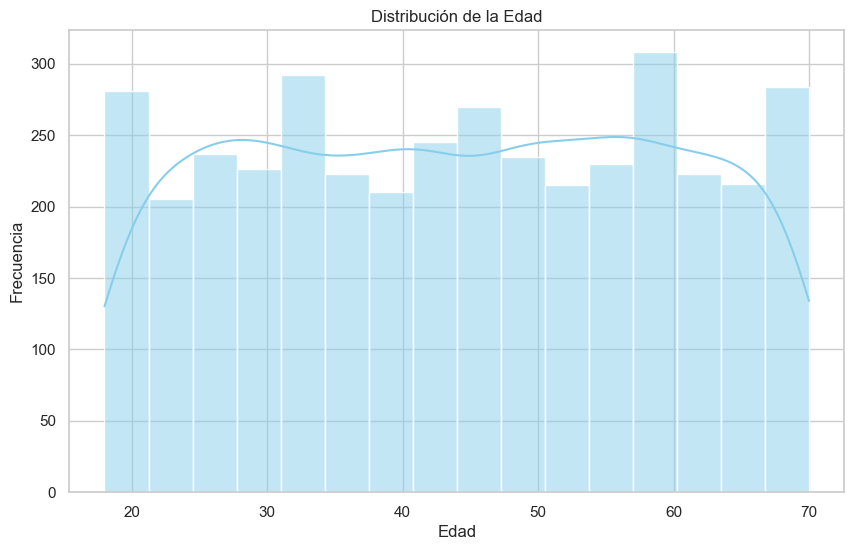

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de seaborn
sns.set(style="whitegrid")

# Histograma de la Edad
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


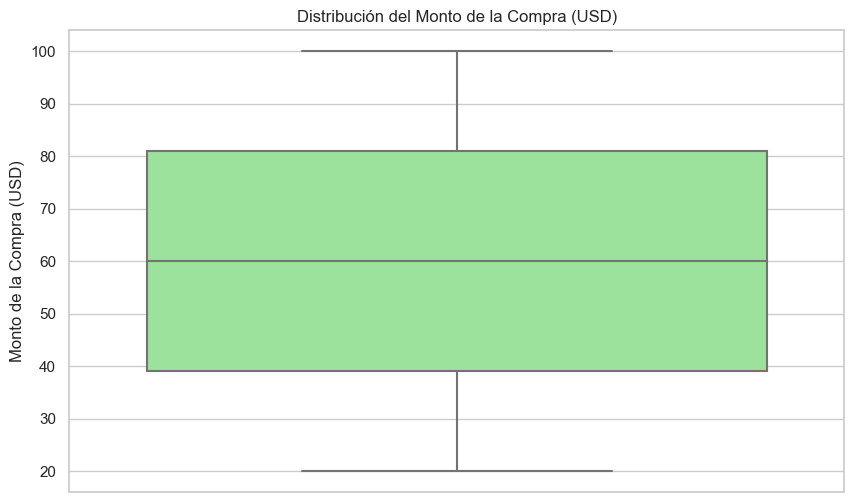

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Purchase Amount (USD)'], color='lightgreen')
plt.title('Distribución del Monto de la Compra (USD)')
plt.ylabel('Monto de la Compra (USD)')
plt.show()


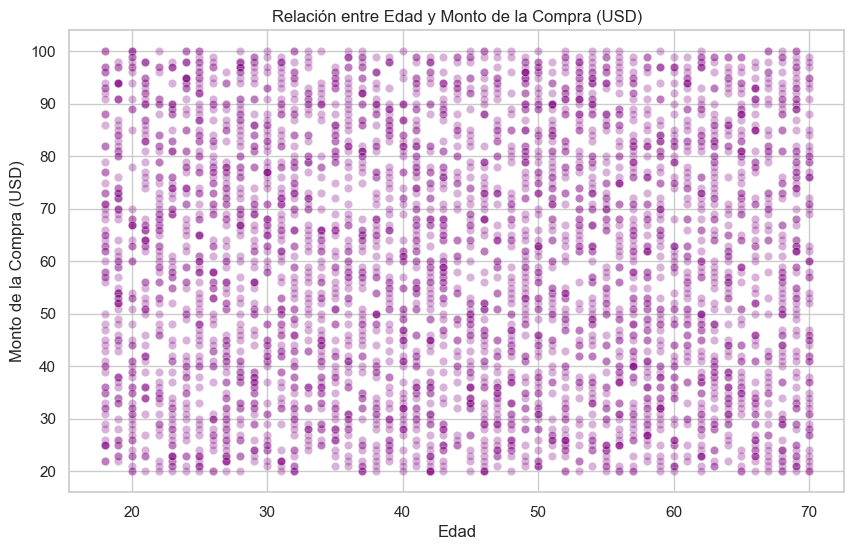

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Purchase Amount (USD)'], alpha=0.3, color='purple')
plt.title('Relación entre Edad y Monto de la Compra (USD)')
plt.xlabel('Edad')
plt.ylabel('Monto de la Compra (USD)')
plt.show()


In [12]:
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Mostramos las primeras filas del nuevo DataFrame codificado
data_encoded.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,53,3.1,14,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,19,64,3.1,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,50,73,3.1,23,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,21,90,3.5,49,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,45,49,2.7,31,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
data_encoded


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.000000,0.711538,0.4125,0.24,0.265306,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0.000256,0.019231,0.5500,0.24,0.020408,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.000513,0.615385,0.6625,0.24,0.448980,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.000769,0.057692,0.8750,0.40,0.979592,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.001026,0.519231,0.3625,0.08,0.612245,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.998974,0.423077,0.1000,0.68,0.632653,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3896,0.999231,0.653846,0.3625,0.80,0.816327,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3897,0.999487,0.538462,0.1625,0.16,0.469388,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3898,0.999744,0.500000,0.7125,0.52,0.469388,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## Aplicación de K-Means con 3 (arbitrario)

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=10)
kmeans.fit(data_encoded)
data_encoded['Cluster'] = kmeans.labels_
data_encoded.head()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Cluster
0,0.000000,0.711538,0.4125,0.24,0.265306,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,2
1,0.000256,0.019231,0.5500,0.24,0.020408,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
2,0.000513,0.615385,0.6625,0.24,0.448980,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,0.000769,0.057692,0.8750,0.40,0.979592,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
4,0.001026,0.519231,0.3625,0.08,0.612245,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2


## Búsqueda del Número Óptimo de Clústere

#### Método del codo

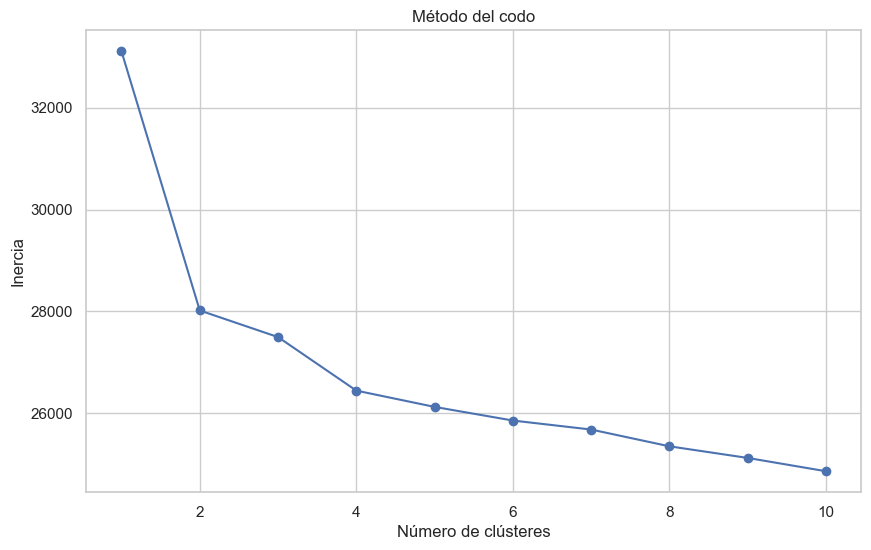

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular la suma de las distancias cuadradas para una gama de números de clústeres
inertia = []
for i in range(1, 11):  # Probar de 1 a 10 clústeres
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(data_encoded)
    inertia.append(km.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()


#### Métrica de la silueta

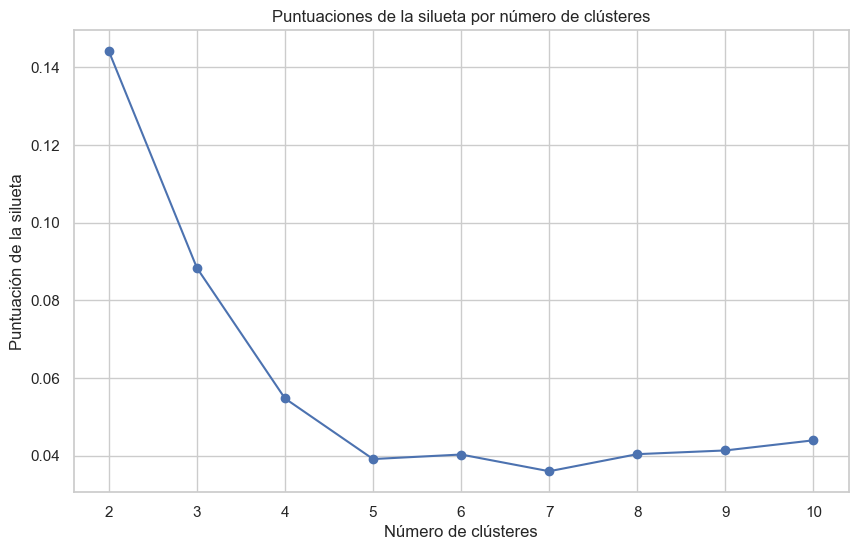

In [17]:
from sklearn.metrics import silhouette_score

# Calcular la puntuación de silueta para cada número de clústeres
silhouette_scores = []
for i in range(2, 11):  # La puntuación de silueta no se puede calcular para un solo clúster
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(data_encoded)
    score = silhouette_score(data_encoded, km.labels_)
    silhouette_scores.append(score)

# Graficar las puntuaciones de silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Puntuaciones de la silueta por número de clústeres')
plt.xlabel('Número de clústeres')
plt.ylabel('Puntuación de la silueta')
plt.show()


## Análisis de Clústeres

In [21]:
from sklearn.cluster import KMeans

# Aplicar K-Means al conjunto de datos
kmeans = KMeans(n_clusters=4, random_state=10)
data_encoded['Cluster'] = kmeans.fit_predict(data_encoded[numerical_columns])

cluster_characteristics = {}
for cluster in range(4):
    cluster_characteristics[cluster] = data_encoded[data_encoded['Cluster'] == cluster].mean()

# Ahora puedes imprimir las características para cada clúster individualmente
for cluster, characteristics in cluster_characteristics.items():
    print(f'Características promedio del clúster {cluster}:')
    print(characteristics)
    print()

Características promedio del clúster 0:
Customer ID                         0.764300
Age                                 0.443552
Purchase Amount (USD)               0.732230
Review Rating                       0.532549
Previous Purchases                  0.444618
                                      ...   
Frequency of Purchases_Quarterly    0.142157
Frequency of Purchases_Weekly       0.126471
Cluster                             0.000000
PCA1                                0.219675
PCA2                                0.184271
Length: 134, dtype: float64

Características promedio del clúster 1:
Customer ID                         0.559724
Age                                 0.746628
Purchase Amount (USD)               0.237309
Review Rating                       0.424179
Previous Purchases                  0.524496
                                      ...   
Frequency of Purchases_Quarterly    0.151886
Frequency of Purchases_Weekly       0.149847
Cluster                             

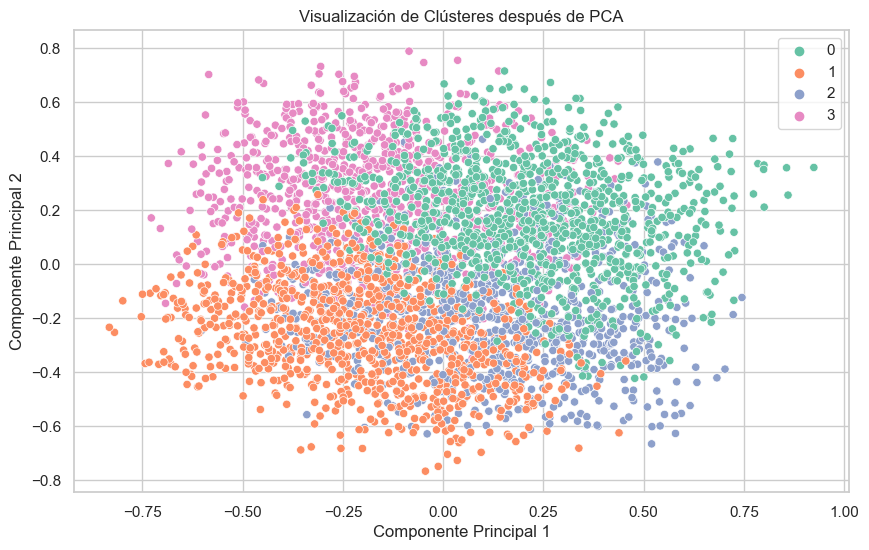

In [20]:
from sklearn.decomposition import PCA

# Configurar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded[numerical_columns])

# Añadir los resultados de PCA al DataFrame
data_encoded['PCA1'] = data_pca[:, 0]
data_encoded['PCA2'] = data_pca[:, 1]

# Graficar los resultados de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_encoded, palette='Set2')
plt.title('Visualización de Clústeres después de PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


#### Clúster 1
* Edad: Menor en promedio.
* Monto de la Compra: Menor gasto.
* Revisiones y Compras Previas: Revisiones algo más bajas, pero con más historial de compras.
* Estrategia: Este segmento podría ser sensible a los precios o a valorar la economía. Se les podrían ofrecer descuentos basados en la frecuencia o volumen de compras. Los productos que ofrecen un buen valor y son fáciles de usar para personas mayores podrían apelar a este clúster.

#### Clúster 2
* Edad: Mayor en promedio. (Grupo más grande)
* Monto de la Compra: Menor gasto.
* Revisiones y Compras Previas: Revisiones algo más bajas, pero con más historial de compras.
* Estrategia: Este segmento podría ser sensible a los precios o valorar la economía. Se les podrían ofrecer descuentos basados en la frecuencia o volumen de compras. Los productos que ofrecen un buen valor y son fáciles de usar para personas mayores podrían apelar a este clúster.

#### Clúster 3
* Edad: Menor en promedio. (Grupo más joven)
* Monto de la Compra: Gasto menor.
* Revisiones y Compras Previas: Revisiones moderadas, historial de compras medio.
* Estrategia: Los clientes más jóvenes pueden estar interesados en tendencias y artículos populares. Las campañas de marketing deben centrarse en las redes sociales y la tecnología móvil. Ofrecer productos asequibles o con ofertas especiales como paquetes podría ser efectivo.

#### Clúster 4
* Edad: Mayor en promedio.
* Monto de la Compra: Gasta más en promedio.
* Revisiones y Compras Previas: Revisiones moderadas, con el historial de compras más alto.
* Estrategia: Este segmento podría incluir líderes de opinión o personas que son leales a la marca y disfrutan de productos de calidad. Puede que sean menos sensibles al precio y más al valor y la calidad. Programas de recompensas, productos de edición limitada y una experiencia de compra personalizada podrían ser atractivos para este grupo.

El análisis de clústeres, como método de segmentación en el estudio de comportamientos de compra, ofrece una forma poderosa de descubrir patrones ocultos en los datos, lo que permite a las organizaciones tomar decisiones informadas y personalizar estrategias de marketing para diferentes grupos de consumidores.

#### Efectividad del Análisis de Clústeres
* Descubrimiento de Segmentos Inexplorados: El análisis de clústeres puede identificar grupos de consumidores que comparten características similares, lo cual no siempre es evidente a primera vista. Esto permite a las empresas dirigirse a nichos de mercado específicos.

* Personalización del Marketing: Al entender las características únicas de cada clúster, las empresas pueden personalizar sus mensajes, ofertas y productos para satisfacer las necesidades específicas de cada segmento, aumentando así la efectividad de sus campañas de marketing.

* Optimización de Recursos: Al focalizar los esfuerzos de marketing y ventas en los segmentos más relevantes, las empresas pueden optimizar el uso de sus recursos, asignándolos donde sean más efectivos.

* Mejora en el Desarrollo de Productos: El conocimiento profundo sobre los diferentes grupos permite a las empresas ajustar sus líneas de productos existentes o desarrollar nuevos productos que satisfagan mejor las demandas de los consumidores.

#### Limitaciones y Posibles Mejoras
* Dinamismo del Mercado: Los patrones de comportamiento de compra cambian con el tiempo, lo que puede hacer que las segmentaciones antiguas se vuelvan obsoletas. Implementar un proceso iterativo de análisis de clústeres, donde los clústeres se revisan y actualizan periódicamente, puede ayudar a mantener la relevancia de los insights.

* Interpretación y Aplicación de los Resultados: La interpretación subjetiva de los clústeres y la aplicación de estrategias basadas en estos pueden variar entre los tomadores de decisiones. Fomentar un enfoque colaborativo y multidisciplinario en la interpretación de los datos puede ayudar a crear una comprensión más profunda y aplicaciones más efectivas.

* Integración con Otras Técnicas de Análisis: El análisis de clústeres puede ser aún más poderoso cuando se combina con otras técnicas analíticas, como el análisis de componentes principales (PCA) para reducir la dimensionalidad o la inteligencia artificial para predecir cambios en los comportamientos de los segmentos.

En conclusión, mientras el análisis de clústeres ofrece una herramienta valiosa para entender el comportamiento de compra y segmentar el mercado, su efectividad depende de una implementación cuidadosa, una revisión constante y una integración con otras técnicas y datos de calidad. La evolución continua en las metodologías de análisis de datos y la adopción de tecnologías emergentes pueden ayudar a superar sus limitaciones y aumentar la precisión y relevancia de los insights generados.